In [1]:
# Importowanie potrzebnych bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import gaussian_kde
from scipy.stats import kstest, anderson
from scipy.stats import skew, kurtosis
from scipy.stats import gamma, lognorm, pareto

# 1 Plik

In [2]:
# Ścieżka do pliku CSV
file_path = "C:/Users/Lukasz/Desktop/studia/Semestr 7/insurance.csv"

# Wczytywanie danych z pliku CSV
try:
    data = pd.read_csv(file_path)
    print("Dane zostały pomyślnie wczytane.")
    print(data.head())
except FileNotFoundError:
    print("Plik nie został znaleziony. Sprawdź ścieżkę.")
except pd.errors.EmptyDataError:
    print("Plik jest pusty.")
except Exception as e:
    print(f"Wystąpił błąd: {e}")

Dane zostały pomyślnie wczytane.
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [3]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
# Dodanie kolumny z ID klienta na początku tabeli
data.insert(0, 'ID', range(1, len(data) + 1))
print(data.head())

   ID  age     sex   bmi  children smoker     region  expenses
0   1   19  female  27.9         0    yes  southwest  16884.92
1   2   18    male  33.8         1     no  southeast   1725.55
2   3   28    male  33.0         3     no  southeast   4449.46
3   4   33    male  22.7         0     no  northwest  21984.47
4   5   32    male  28.9         0     no  northwest   3866.86


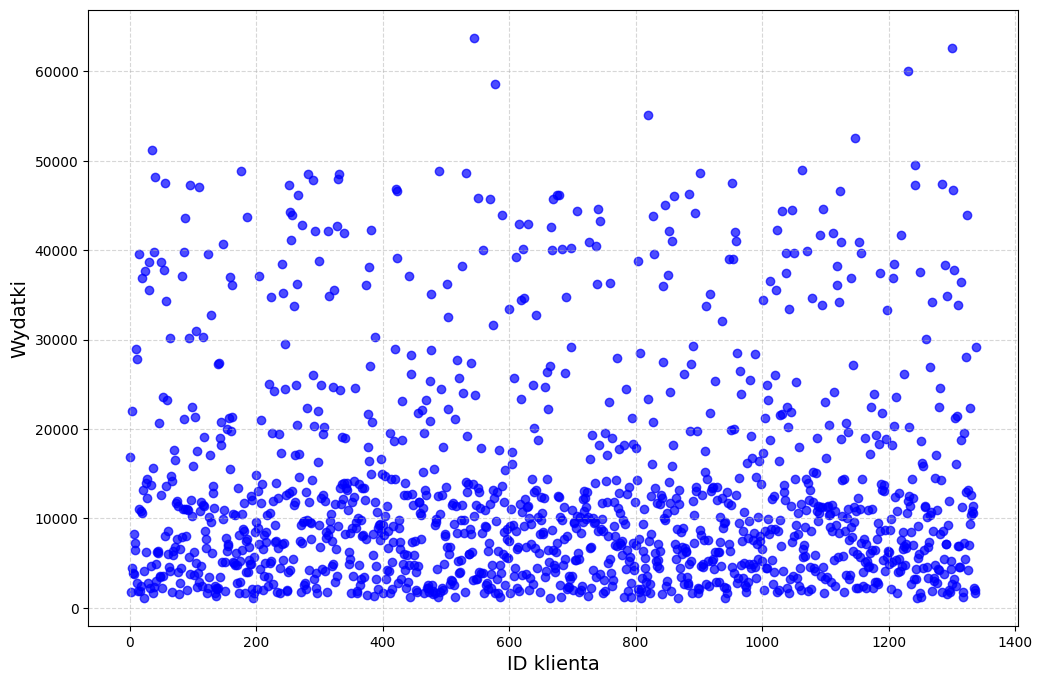

In [7]:
# Tworzenie wykresu punktowego wydatków
plt.figure(figsize=(12, 8))
plt.scatter(data['ID'], data['expenses'], color='blue', alpha=0.7)
#plt.title('Wykres punktowy wydatków', fontsize=16)
plt.xlabel('ID klienta', fontsize=14)
plt.ylabel('Wydatki', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

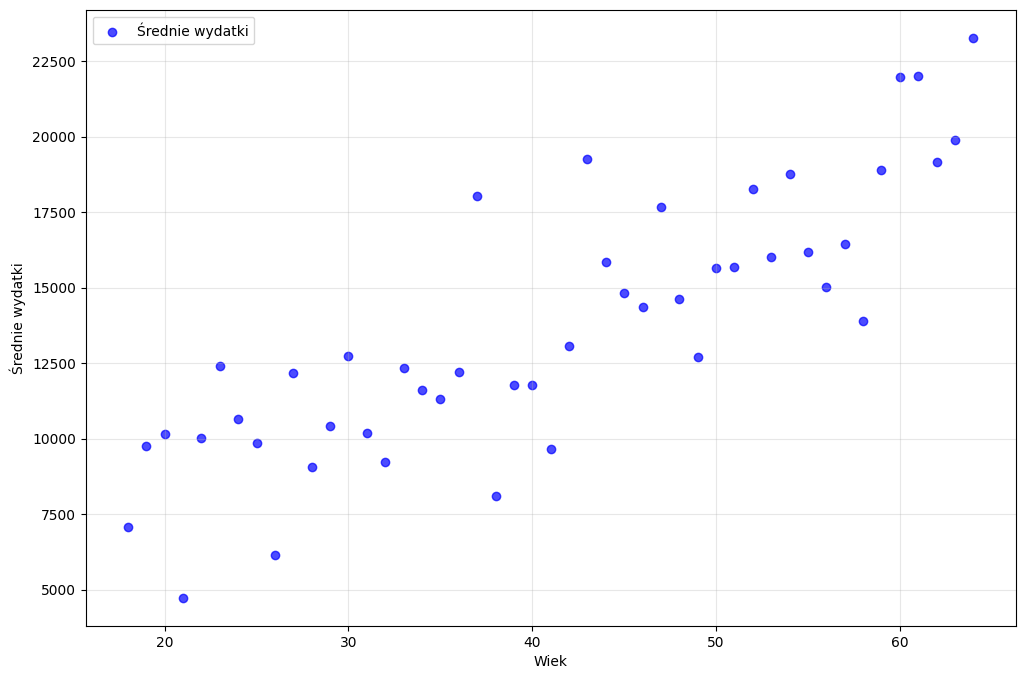

In [8]:
# Obliczenie średnich wydatków dla każdego wieku
srednie_wydatki = data.groupby('age')['expenses'].mean()

# Rysowanie wykresu punktowego
plt.figure(figsize=(12, 8))
plt.scatter(srednie_wydatki.index, srednie_wydatki.values, color='blue', alpha=0.7, label='Średnie wydatki')
#plt.title('Średnie wydatki na ubezpieczenia zależności od wieku')
plt.xlabel('Wiek')
plt.ylabel('Średnie wydatki')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

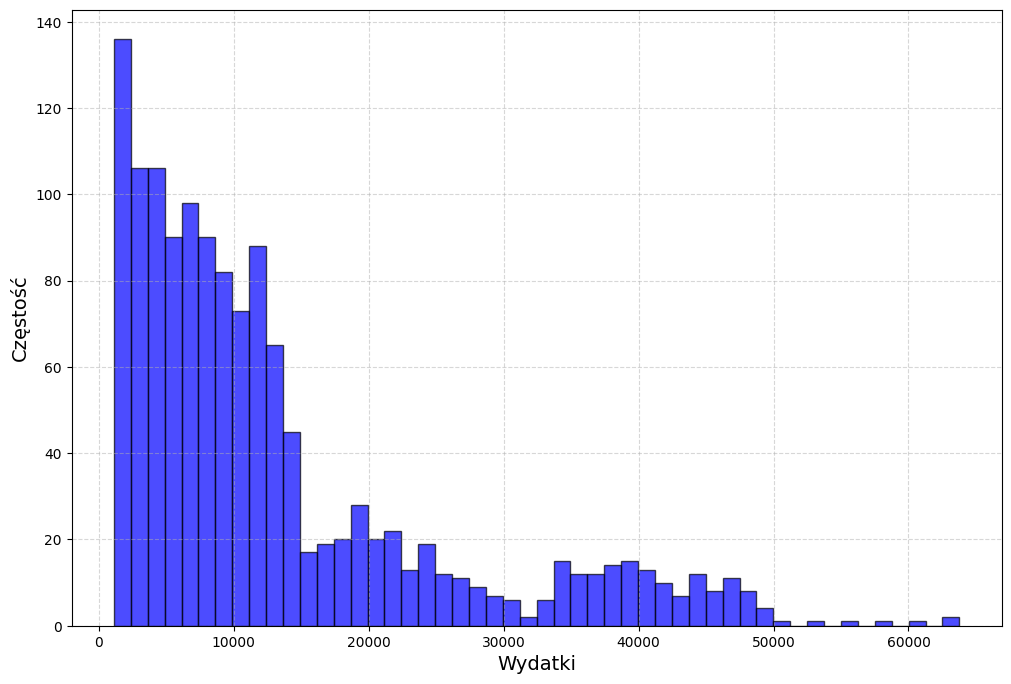

In [9]:
# Tworzenie histogramu wydatków
plt.figure(figsize=(12, 8))
plt.hist(data['expenses'], bins=50, color='blue', edgecolor='black', alpha=0.7)
#plt.title('Histogram wydatków', fontsize=16)
plt.xlabel('Wydatki', fontsize=14)
plt.ylabel('Częstość', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

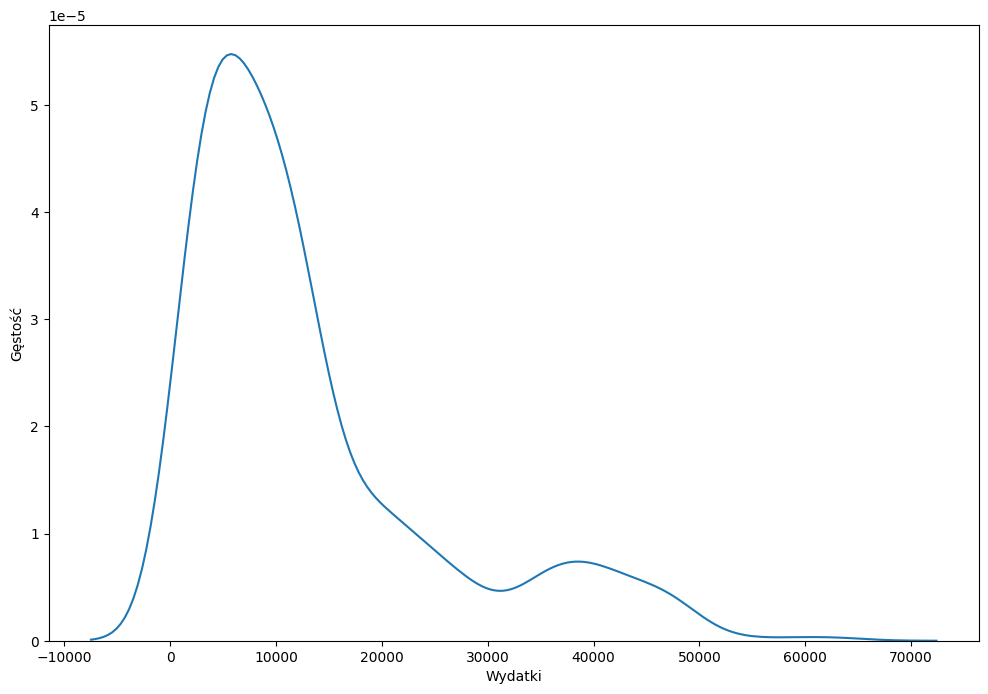

In [10]:
# Wykres gęstości wydatków
plt.figure(figsize=(12, 8))
sns.kdeplot(data['expenses'])
#plt.title("Wykres gęstości wydatków")
plt.xlabel("Wydatki")
plt.ylabel("Gęstość")
plt.show()

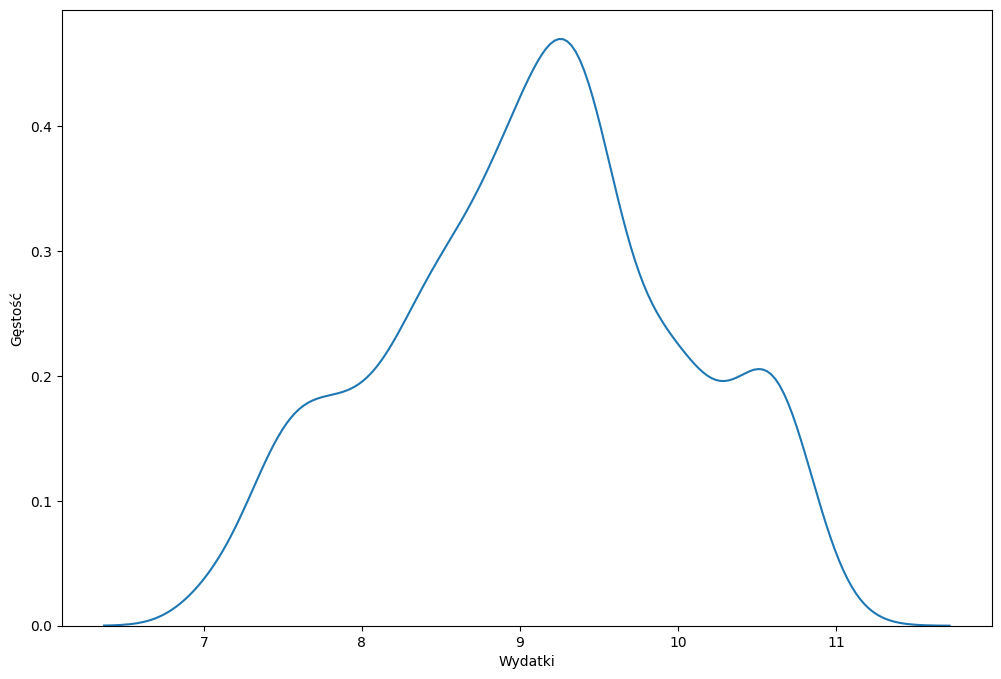

In [11]:
# Wykres gęstości wydatków po zlogarytmowanie danych
plt.figure(figsize=(12, 8))
sns.kdeplot(np.log(data['expenses']))
#plt.title("Wykres gęstości wydatków po zlogarytmowaniu danych")
plt.xlabel("Wydatki")
plt.ylabel("Gęstość")
plt.show()

Średnia wydatków:  13270.422414050823
Odchylenie standardowe:  12105.484978572953
Średnia wydatków po zlogarytmowaniu:  9.098658755216183
Odchylenie standardowe po zlogarytmowaniu:  0.9191834027815341
Value at risk metodą wariancji-kowariancji:
  VaR 95%: 1971.87
  VaR 99%: 1053.97


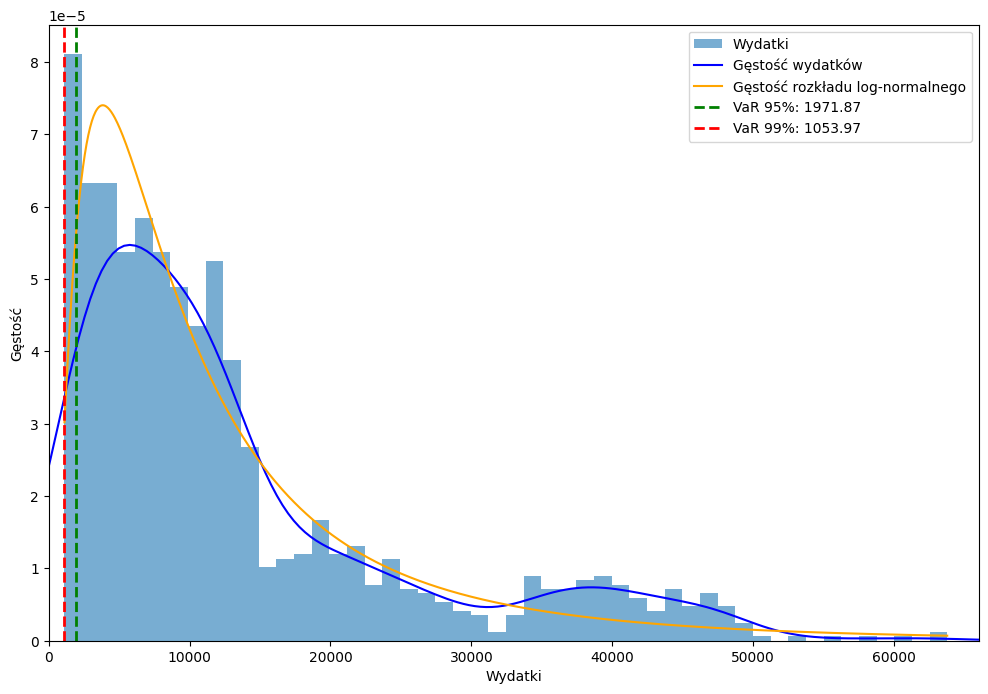

In [12]:
wydatki=data["expenses"]

# Poziomy ufności
confidence_level_95 = 0.95
confidence_level_99 = 0.99

mu = np.mean(wydatki)
print("Średnia wydatków: ", mu)
sigma = np.std(wydatki)
print("Odchylenie standardowe: ", sigma)

# Metoda wariancji-kowariancji dla rozkładu logarytmiczno-normalnego
log_data = np.log(wydatki)  # Logarytmowanie danych
mu = np.mean(log_data)
print("Średnia wydatków po zlogarytmowaniu: ", mu)
sigma = np.std(log_data)
print("Odchylenie standardowe po zlogarytmowaniu: ", sigma)
VaR_cov_95 = np.exp(mu - stats.norm.ppf(confidence_level_95) * sigma)
VaR_cov_99 = np.exp(mu - stats.norm.ppf(confidence_level_99) * sigma)

# Wyświetlenie wyników
print(f"Value at risk metodą wariancji-kowariancji:")
print(f"  VaR 95%: {VaR_cov_95:.2f}")
print(f"  VaR 99%: {VaR_cov_99:.2f}")

# Tworzenie wykresu
plt.figure(figsize=(12, 8))
plt.hist(wydatki, bins=50, alpha=0.6, label="Wydatki", density=True)
x = np.linspace(min(wydatki), max(wydatki), 1000)
pdf = stats.lognorm.pdf(x, s=sigma, scale=np.exp(mu))
sns.kdeplot(data['expenses'], color='blue', label="Gęstość wydatków")
plt.plot(x, pdf, 'orange', label="Gęstość rozkładu log-normalnego")
plt.axvline(VaR_cov_95, color='green', linestyle='dashed', linewidth=2, label=f"VaR 95%: {VaR_cov_95:.2f}")
plt.axvline(VaR_cov_99, color='red', linestyle='dashed', linewidth=2, label=f"VaR 99%: {VaR_cov_99:.2f}")
plt.xlim(0, 66000)
#plt.title("Value at Risk metodą wariancji-kowariacji dla rozkładu logarytmiczno normalnego")
plt.xlabel("Wydatki")
plt.ylabel("Gęstość")
plt.legend()
plt.show()

In [13]:
skewness = skew(wydatki)
kurtosis_value = kurtosis(wydatki)
print(skewness)
print(kurtosis_value)

1.5141797167430497
1.5958213684180036


In [14]:
gamma_params = gamma.fit(wydatki)
lognorm_params = lognorm.fit(wydatki)

# Test dla gamma
ks_gamma = kstest(wydatki, "gamma", args=gamma_params)
print(ks_gamma)

# Test dla log-normalnego
ks_lognorm = kstest(wydatki, "lognorm", args=lognorm_params)
print(ks_lognorm)

KstestResult(statistic=0.06018338547487834, pvalue=0.00011788509097231956, statistic_location=14478.33, statistic_sign=1)
KstestResult(statistic=0.038368057655881416, pvalue=0.0379136806908239, statistic_location=8211.1, statistic_sign=-1)


Value at risk metodą historyczną:
  VaR 95%: 1748.77
  VaR 99%: 1252.41


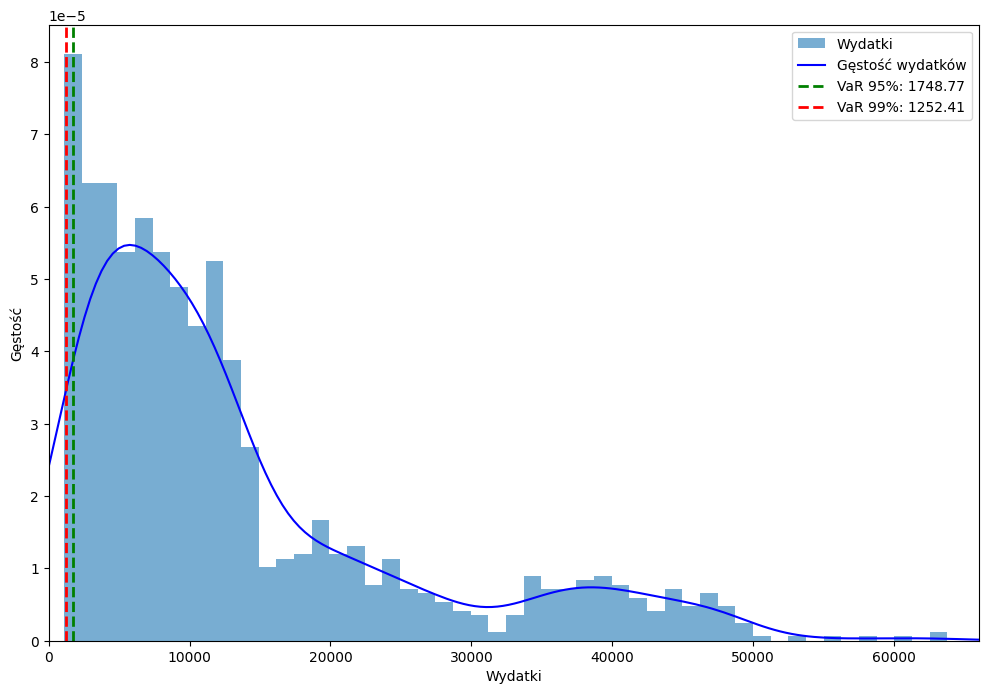

In [15]:
# Poziomy ufności
confidence_level_95 = 0.95
confidence_level_99 = 0.99

# Metoda historyczna
sorted_data = np.sort(wydatki)
VaR_hist_95 = sorted_data[int((1 - confidence_level_95) * len(sorted_data))]
VaR_hist_99 = sorted_data[int((1 - confidence_level_99) * len(sorted_data))]

# Wyświetlanie wyników
print(f"Value at risk metodą historyczną:")
print(f"  VaR 95%: {VaR_hist_95:.2f}")
print(f"  VaR 99%: {VaR_hist_99:.2f}")

# Tworzenie wykresu
plt.figure(figsize=(12, 8))
plt.hist(wydatki, bins=50, alpha=0.6, label="Wydatki", density=True)
sns.kdeplot(data['expenses'], color="blue", label="Gęstość wydatków")
plt.axvline(VaR_hist_95, color='green', linestyle='dashed', linewidth=2, label=f"VaR 95%: {VaR_hist_95:.2f}")
plt.axvline(VaR_hist_99, color='red', linestyle='dashed', linewidth=2, label=f"VaR 99%: {VaR_hist_99:.2f}")
plt.xlim(0, 66000)
#plt.title("Value at Risk metodą historyczną")
plt.xlabel("Wydatki")
plt.ylabel("Gęstość")
plt.legend()
plt.show()

Value at risk metodą symulacji Monte Carlo:
  VaR 95%: 1997.64
  VaR 99%: 1068.62


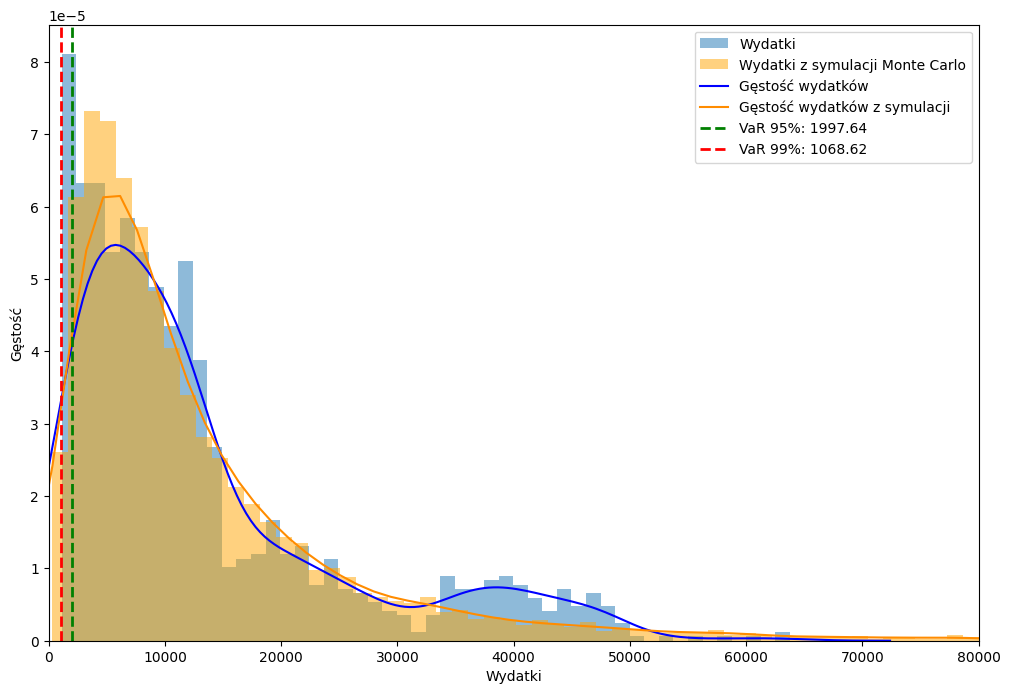

In [16]:
# Poziomy ufności
confidence_level_95 = 0.95
confidence_level_99 = 0.99

# Symulacja Monte Carlo
log_data = np.log(wydatki)  # Logarytmowanie danych
mu = np.mean(log_data)
sigma = np.std(log_data)
n_simulations = 10000
simulated_data = np.random.lognormal(mu, sigma, n_simulations)
VaR_mc_95 = np.percentile(simulated_data, (1 - confidence_level_95) * 100)
VaR_mc_99 = np.percentile(simulated_data, (1 - confidence_level_99) * 100)

# Wyświetlenie wyników
print(f"Value at risk metodą symulacji Monte Carlo:")
print(f"  VaR 95%: {VaR_mc_95:.2f}")
print(f"  VaR 99%: {VaR_mc_99:.2f}")

# Wizualizacja danych historycznych i Monte Carlo
plt.figure(figsize=(12, 8))
plt.hist(wydatki, bins=50, alpha=0.5, label="Wydatki", density=True)
plt.hist(simulated_data, bins=200, color="orange",  alpha=0.5, label="Wydatki z symulacji Monte Carlo", density=True)
sns.kdeplot(data['expenses'], color="blue", label="Gęstość wydatków")
sns.kdeplot(simulated_data, color="darkorange", label="Gęstość wydatków z symulacji")
plt.axvline(VaR_mc_95, color='green', linestyle='dashed', linewidth=2, label=f"VaR 95%: {VaR_mc_95:.2f}")
plt.axvline(VaR_mc_99, color='red', linestyle='dashed', linewidth=2, label=f"VaR 99%: {VaR_mc_99:.2f}")
plt.xlim(0, 80000)
#plt.title("Value at risk metodą symulacji Monte Carlo")
plt.xlabel("Wydatki")
plt.ylabel("Gęstość")
plt.legend()
plt.show()

# 2 Plik

In [17]:
# Ścieżka do pliku CSV
file_path = "C:/Users/Lukasz/Desktop/studia/Semestr 7/Motor_insurance.csv"

# Wczytywanie danych z pliku CSV
try:
    dane = pd.read_csv(file_path, delimiter=';')
    print("Dane zostały pomyślnie wczytane.")
    #print(data.head())
except FileNotFoundError:
    print("Plik nie został znaleziony. Sprawdź ścieżkę.")
except pd.errors.EmptyDataError:
    print("Plik jest pusty.")
except Exception as e:
    print(f"Wystąpił błąd: {e}")

Dane zostały pomyślnie wczytane.


In [18]:
# Transpozycja danych
dane_transposed = dane.transpose()
print(dane_transposed)

                          0           1           2           3       \
ID                             1           1           1           1   
Date_start_contract   05/11/2015  05/11/2015  05/11/2015  05/11/2015   
Date_last_renewal     05/11/2015  05/11/2016  05/11/2017  05/11/2018   
Date_next_renewal     05/11/2016  05/11/2017  05/11/2018  05/11/2019   
Date_birth            15/04/1956  15/04/1956  15/04/1956  15/04/1956   
Date_driving_licence  20/03/1976  20/03/1976  20/03/1976  20/03/1976   
Distribution_channel           0           0           0           0   
Seniority                      4           4           4           4   
Policies_in_force              1           1           2           2   
Max_policies                   2           2           2           2   
Max_products                   1           1           1           1   
Lapse                          0           0           0           0   
Date_lapse                   NaN         NaN         NaN        

In [19]:
dane.describe()

,ID,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Premium,Cost_claims_year,...,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Length,Weight
count,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,...,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,95226.000000,105555.000000
mean,26271.286789,0.451310,6.696604,1.455649,1.837232,1.065842,0.221837,0.319180,315.892557,153.557305,...,2.721804,0.273895,0.123708,2004.728038,92.682611,1617.759367,18413.657243,4.067898,4.252007,1191.262422
std,15388.309324,0.497626,6.263911,0.928427,1.155536,0.267807,0.464858,0.466161,140.927969,1477.112362,...,0.614835,0.445958,0.329250,6.767037,37.012645,604.697382,9135.074235,1.511839,0.393220,458.081834
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.140000,0.000000,...,1.000000,0.000000,0.000000,1950.000000,0.000000,49.000000,270.460000,0.000000,1.978000,43.000000
25%,12925.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,241.610000,0.000000,...,3.000000,0.000000,0.000000,2001.000000,75.000000,1390.000000,13127.210000,3.000000,3.999000,1043.000000
50%,26082.000000,0.000000,4.000000,1.000000,2.000000,1.000000,0.000000,0.000000,292.280000,0.000000,...,3.000000,0.000000,0.000000,2005.000000,90.000000,1598.000000,17608.770000,5.000000,4.230000,1205.000000
75%,39754.000000,1.000000,9.000000,2.000000,2.000000,1.000000,0.000000,1.000000,361.640000,0.000000,...,3.000000,1.000000,0.000000,2008.000000,110.000000,1910.000000,22595.000000,5.000000,4.443000,1388.000000
max,53502.000000,1.000000,40.000000,17.000000,17.000000,4.000000,7.000000,1.000000,2993.340000,260853.240000,...,4.000000,1.000000,1.000000,2018.000000,580.000000,7480.000000,220675.800000,6.000000,8.218000,7300.000000


In [20]:
dane.isna().sum()

ID                          0
Date_start_contract         0
Date_last_renewal           0
Date_next_renewal           0
Date_birth                  0
Date_driving_licence        0
Distribution_channel        0
Seniority                   0
Policies_in_force           0
Max_policies                0
Max_products                0
Lapse                       0
Date_lapse              70408
Payment                     0
Premium                     0
Cost_claims_year            0
N_claims_year               0
N_claims_history            0
R_Claims_history            0
Type_risk                   0
Area                        0
Second_driver               0
Year_matriculation          0
Power                       0
Cylinder_capacity           0
Value_vehicle               0
N_doors                     0
Type_fuel                1764
Length                  10329
Weight                      0
dtype: int64

In [21]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    105555 non-null  int64  
 1   Date_start_contract   105555 non-null  object 
 2   Date_last_renewal     105555 non-null  object 
 3   Date_next_renewal     105555 non-null  object 
 4   Date_birth            105555 non-null  object 
 5   Date_driving_licence  105555 non-null  object 
 6   Distribution_channel  105555 non-null  int64  
 7   Seniority             105555 non-null  int64  
 8   Policies_in_force     105555 non-null  int64  
 9   Max_policies          105555 non-null  int64  
 10  Max_products          105555 non-null  int64  
 11  Lapse                 105555 non-null  int64  
 12  Date_lapse            35147 non-null   object 
 13  Payment               105555 non-null  int64  
 14  Premium               105555 non-null  float64
 15  

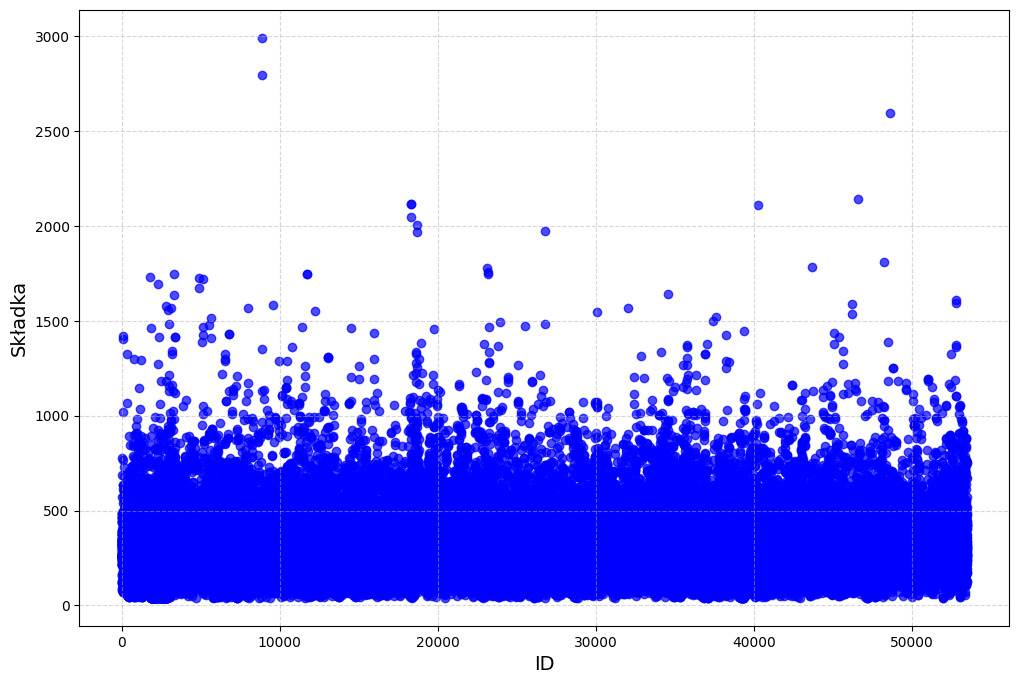

In [22]:
# Tworzenie wykresu punktowego wydatków
plt.figure(figsize=(12, 8))
plt.scatter(dane['ID'], dane['Premium'], color='blue', alpha=0.7)
#plt.title('Wykres punktowy wydatków', fontsize=16)
plt.xlabel('ID', fontsize=14)
plt.ylabel('Składka', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

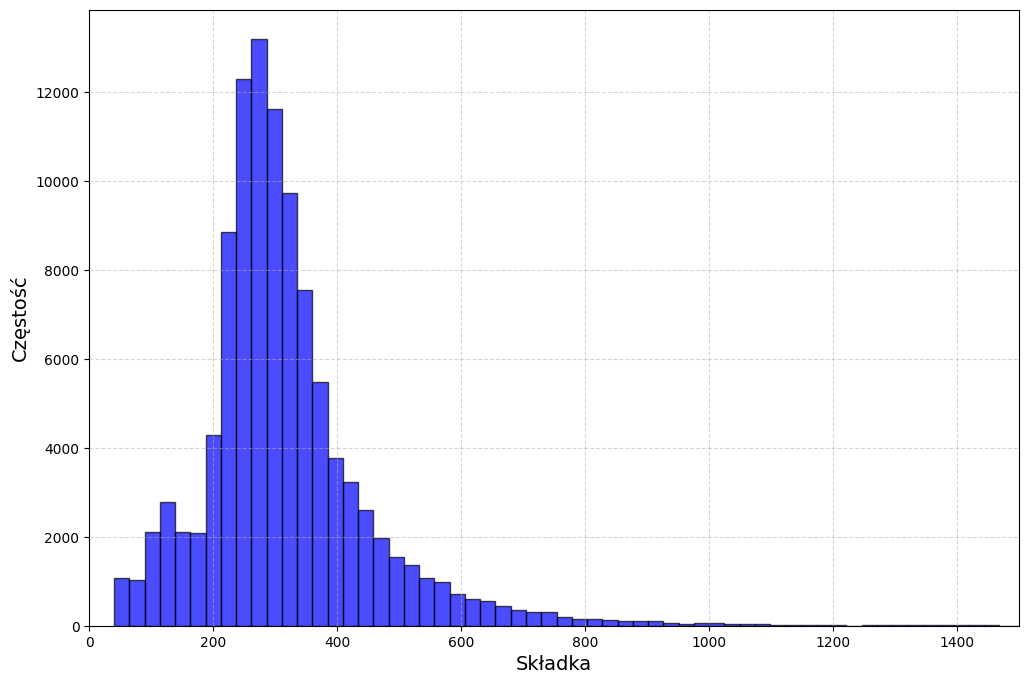

In [23]:
# Tworzenie histogramu wydatków
plt.figure(figsize=(12, 8))
plt.hist(dane['Premium'], bins=120, color='blue', edgecolor='black', alpha=0.7)
#plt.title('Histogram wydatków', fontsize=16)
plt.xlabel('Składka', fontsize=14)
plt.ylabel('Częstość', fontsize=14)
plt.xlim(0, 1500)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

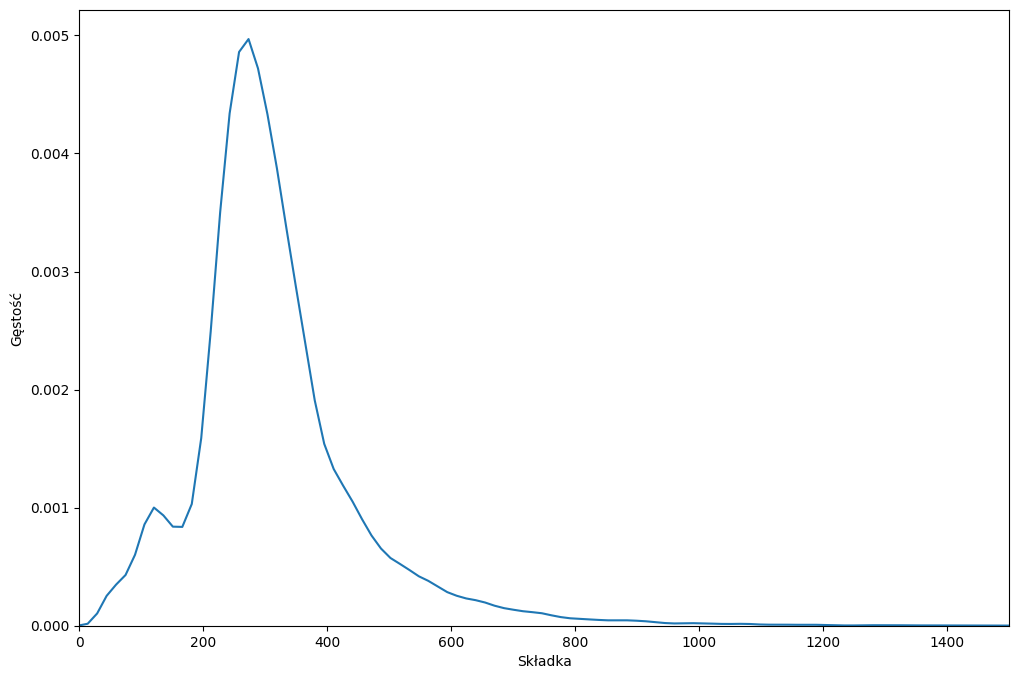

In [24]:
# Wykres gęstości wydatków
plt.figure(figsize=(12, 8))
sns.kdeplot(dane['Premium'])
#plt.title("Wykres gęstości wydatków")
plt.xlim(0, 1500)
plt.xlabel("Składka")
plt.ylabel("Gęstość")
plt.show()

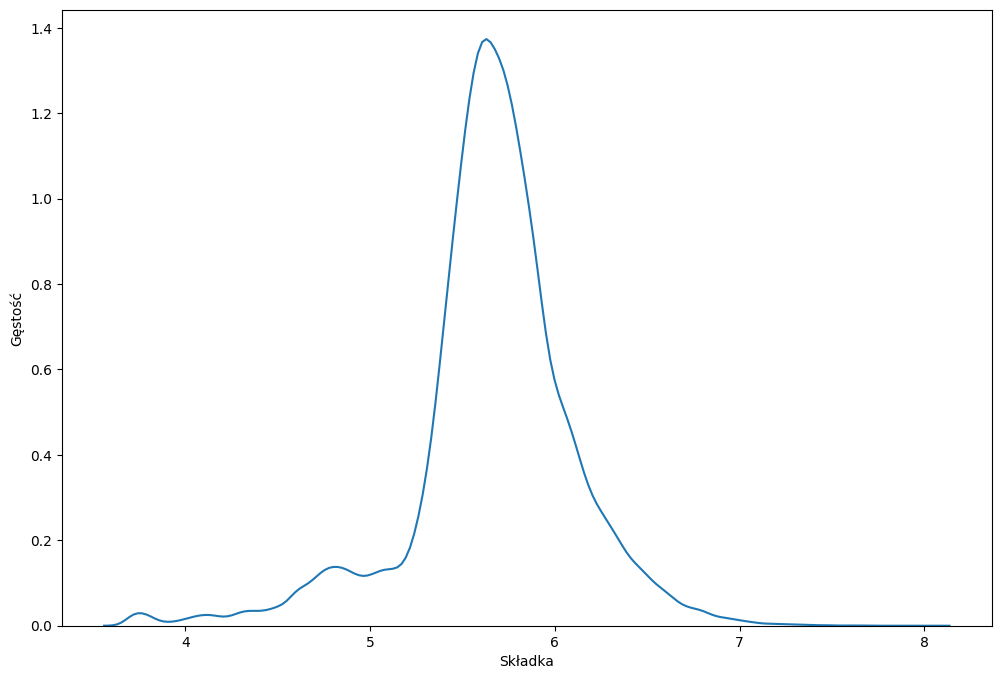

In [25]:
# Wykres gęstości wydatków po zlogarytmowanie danych
plt.figure(figsize=(12, 8))
sns.kdeplot(np.log(dane['Premium']))
#plt.title("Wykres gęstości wydatków po zlogarytmowaniu danych")
plt.xlabel("Składka")
plt.ylabel("Gęstość")
plt.show()

In [26]:
skewness = skew(dane["Premium"])
kurtosis_value = kurtosis(dane["Premium"])
print(skewness)
print(kurtosis_value)

2.2178373668773097
13.00130872114035


In [27]:
gamma_params = gamma.fit(dane["Premium"])
lognorm_params = lognorm.fit(dane["Premium"])

# Test dla gamma
ks_gamma = kstest(dane["Premium"], "gamma", args=gamma_params)
print(ks_gamma)

# Test dla log-normalnego
ks_lognorm = kstest(dane["Premium"], "lognorm", args=lognorm_params)
print(ks_lognorm)

KstestResult(statistic=0.9946231717176501, pvalue=0.0, statistic_location=49.39, statistic_sign=-1)
KstestResult(statistic=0.07714862799054975, pvalue=0.0, statistic_location=220.49, statistic_sign=-1)


Średnia wydatków:  315.8925572450381
Odchylenie standardowe:  140.92730136619994
Średnia wydatków po zlogarytmowaniu:  5.663791981345274
Odchylenie standardowe po zlogarytmowaniu:  0.4437915110313584
Value at risk metodą wariancji-kowariancji:
  VaR 95%: 138.91
  VaR 99%: 102.66


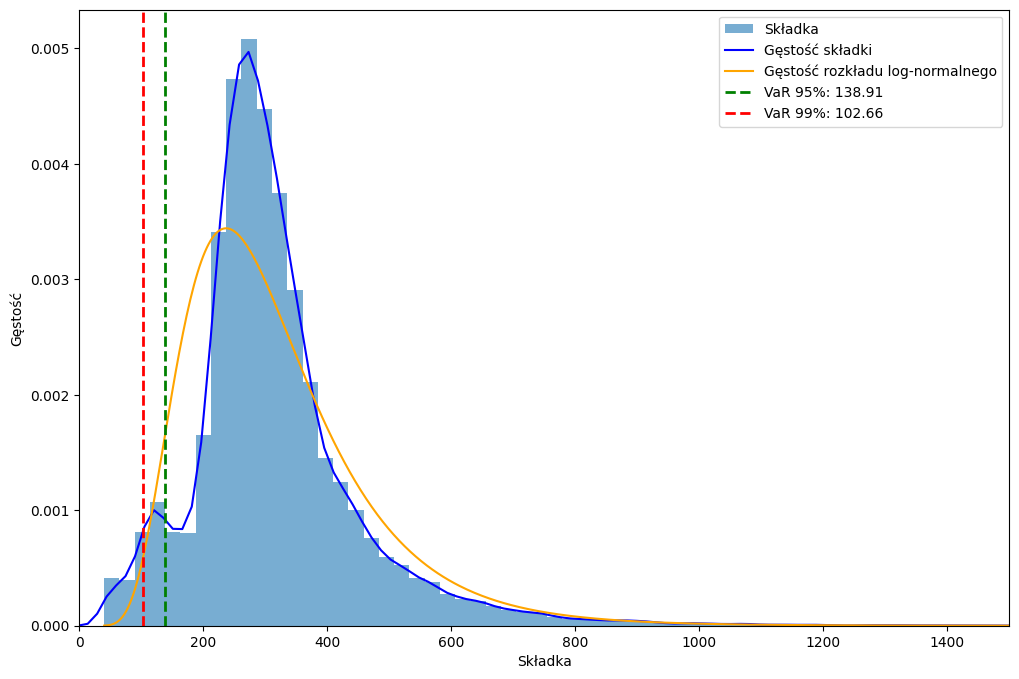

In [28]:
premium=dane["Premium"]

# Poziomy ufności
confidence_level_95 = 0.95
confidence_level_99 = 0.99

mu = np.mean(premium)
print("Średnia wydatków: ", mu)
sigma = np.std(premium)
print("Odchylenie standardowe: ", sigma)

# Metoda wariancji-kowariancji dla rozkładu logarytmiczno-normalnego
log_dane = np.log(premium)  # Logarytmowanie danych
mu = np.mean(log_dane)
print("Średnia wydatków po zlogarytmowaniu: ", mu)
sigma = np.std(log_dane)
print("Odchylenie standardowe po zlogarytmowaniu: ", sigma)
VaR_cov_95 = np.exp(mu - stats.norm.ppf(confidence_level_95) * sigma)
VaR_cov_99 = np.exp(mu - stats.norm.ppf(confidence_level_99) * sigma)

# Wyświetlenie wyników
print(f"Value at risk metodą wariancji-kowariancji:")
print(f"  VaR 95%: {VaR_cov_95:.2f}")
print(f"  VaR 99%: {VaR_cov_99:.2f}")

# Tworzenie wykresu
plt.figure(figsize=(12, 8))
plt.hist(premium, bins=120, alpha=0.6, label="Składka", density=True)
x = np.linspace(min(premium), max(premium), 1000)
pdf = stats.lognorm.pdf(x, s=sigma, scale=np.exp(mu))
sns.kdeplot(dane['Premium'], color='blue', label="Gęstość składki")
plt.plot(x, pdf, 'orange', label="Gęstość rozkładu log-normalnego")
plt.axvline(VaR_cov_95, color='green', linestyle='dashed', linewidth=2, label=f"VaR 95%: {VaR_cov_95:.2f}")
plt.axvline(VaR_cov_99, color='red', linestyle='dashed', linewidth=2, label=f"VaR 99%: {VaR_cov_99:.2f}")
plt.xlim(0, 1500)
#plt.title("Value at Risk metodą wariancji-kowariacji dla rozkładu logarytmiczno normalnego")
plt.xlabel("Składka")
plt.ylabel("Gęstość")
plt.legend()
plt.show()

Value at risk metodą historyczną:
  VaR 95%: 122.40
  VaR 99%: 64.35


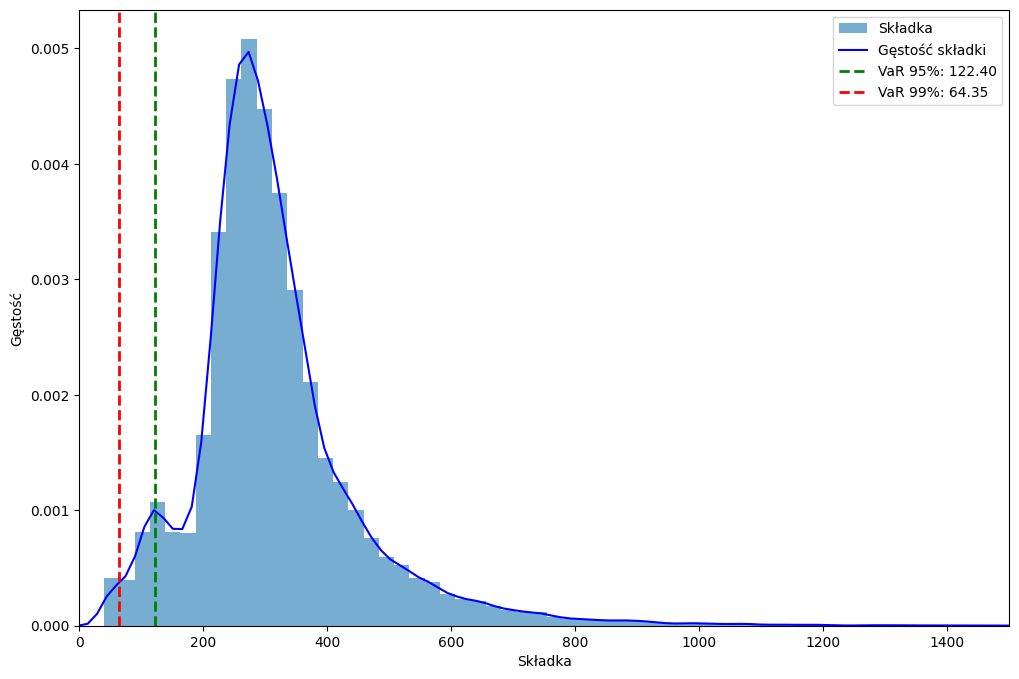

In [31]:
# Poziomy ufności
confidence_level_95 = 0.95
confidence_level_99 = 0.99

# Metoda historyczna
sorted_dane = np.sort(premium)
VaR_hist_95 = sorted_dane[int((1 - confidence_level_95) * len(sorted_dane))]
VaR_hist_99 = sorted_dane[int((1 - confidence_level_99) * len(sorted_dane))]

# Wyświetlanie wyników
print(f"Value at risk metodą historyczną:")
print(f"  VaR 95%: {VaR_hist_95:.2f}")
print(f"  VaR 99%: {VaR_hist_99:.2f}")

# Tworzenie wykresu
plt.figure(figsize=(12, 8))
plt.hist(premium, bins=120, alpha=0.6, label="Składka", density=True)
sns.kdeplot(dane['Premium'], color="blue", label="Gęstość składki")
plt.axvline(VaR_hist_95, color='green', linestyle='dashed', linewidth=2, label=f"VaR 95%: {VaR_hist_95:.2f}")
plt.axvline(VaR_hist_99, color='red', linestyle='dashed', linewidth=2, label=f"VaR 99%: {VaR_hist_99:.2f}")
plt.xlim(0, 1500)
#plt.title("Value at Risk metodą historyczną")
plt.xlabel("Składka")
plt.ylabel("Gęstość")
plt.legend()
plt.show()

Value at risk metodą symulacji Monte Carlo:
  VaR 95%: 138.80
  VaR 99%: 101.92


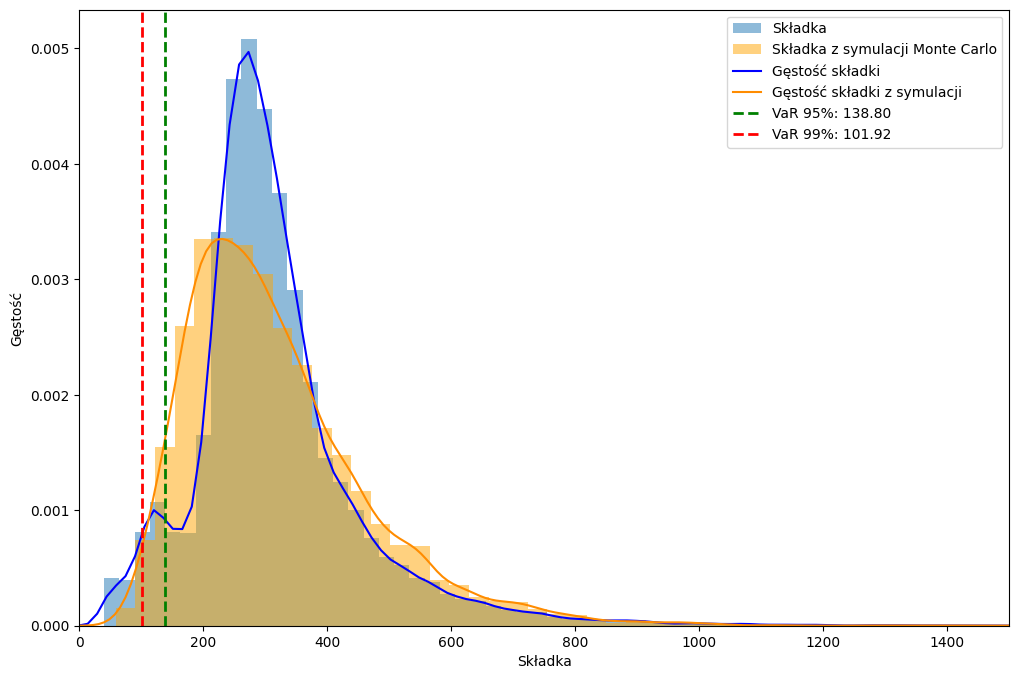

In [33]:
# Poziomy ufności
confidence_level_95 = 0.95
confidence_level_99 = 0.99

# Symulacja Monte Carlo
log_dane = np.log(premium)  # Logarytmowanie danych
mu = np.mean(log_dane)
sigma = np.std(log_dane)
n_simulations = 10000
simulated_dane = np.random.lognormal(mu, sigma, n_simulations)
VaR_mc_95 = np.percentile(simulated_dane, (1 - confidence_level_95) * 100)
VaR_mc_99 = np.percentile(simulated_dane, (1 - confidence_level_99) * 100)

# Wyświetlenie wyników
print(f"Value at risk metodą symulacji Monte Carlo:")
print(f"  VaR 95%: {VaR_mc_95:.2f}")
print(f"  VaR 99%: {VaR_mc_99:.2f}")

# Wizualizacja danych historycznych i Monte Carlo
plt.figure(figsize=(12, 8))
plt.hist(premium, bins=120, alpha=0.5, label="Składka", density=True)
plt.hist(simulated_dane, bins=50, color="orange",  alpha=0.5, label="Składka z symulacji Monte Carlo", density=True)
sns.kdeplot(dane['Premium'], color="blue", label="Gęstość składki")
sns.kdeplot(simulated_dane, color="darkorange", label="Gęstość składki z symulacji")
plt.axvline(VaR_mc_95, color='green', linestyle='dashed', linewidth=2, label=f"VaR 95%: {VaR_mc_95:.2f}")
plt.axvline(VaR_mc_99, color='red', linestyle='dashed', linewidth=2, label=f"VaR 99%: {VaR_mc_99:.2f}")
plt.xlim(0, 1500)
#plt.title("Value at risk metodą symulacji Monte Carlo")
plt.xlabel("Składka")
plt.ylabel("Gęstość")
plt.legend()
plt.show()